In [87]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
print(os.listdir("./"))

['cv.ipynb', 'submission.csv', 'test', 'test.ipynb', 'train']


In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [89]:
labels = ['broken_grain', 'full_grain', 'mixed_grain']
def classNoGen(img):
    if img[0] == 'b':
        return 0
    elif img[0] == 'f':
        return 1
    elif img[0] == 'm':
        return 2
    elif img[0] =='t':
        return '-1'
img_size = 150
def get_data(data_dir):
    data = [] 
    path = data_dir
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = classNoGen(img)
        img = cv2.imread(img_path)[...,::-1]
        img = cv2.resize(img, (img_size, img_size))
        data.append([img, label])
    return np.array(data)

In [90]:
train = get_data('./train')
test= get_data('./train')
p= get_data('./test')

<AxesSubplot:ylabel='count'>

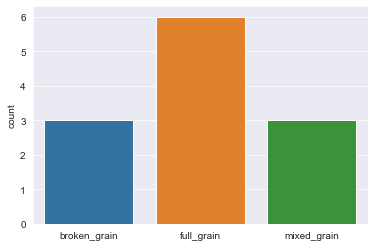

In [91]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("broken_grain")
    elif(i[1] == 1):
        l.append("full_grain")
    else:
        l.append("mixed_grain")

sns.set_style('darkgrid')
sns.countplot(l)

In [92]:
x_train = []
y_train = []
x_test = []
y_test = []
x_p =[]
y_p = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

for feature, label in p:
  x_p.append(feature)
  y_p.append(label)


# Normalize the data
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255
x_p = np.array(x_p) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

x_p.reshape(-1, img_size, img_size, 1)
y_p = np.array(y_p)

In [93]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)
datagen.fit(x_test)
datagen.fit(x_p)

In [94]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

model = VGG16(weights='imagenet', include_top=False)

In [95]:
train_features = model.predict(x_train)
test_features = model.predict(x_test)
p_features = model.predict(x_p)

In [96]:
n_train, x, y, z = train_features.shape
n_test, x, y, z = test_features.shape
n_p, x, y, z = p_features.shape
numFeatures = x * y * z
print(x, y, z)

4 4 512


In [97]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (x, y, z)),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(train_features, y_train, batch_size=128, epochs=30)


Epoch 1/30
1/1 [==============================] - 0s 431ms/step - loss: 1.2747 - accuracy: 0.2500
Epoch 2/30
1/1 [==============================] - 0s 6ms/step - loss: 1.2241 - accuracy: 0.5000
Epoch 3/30
1/1 [==============================] - 0s 6ms/step - loss: 1.0116 - accuracy: 0.5000
Epoch 4/30
1/1 [==============================] - 0s 7ms/step - loss: 0.7903 - accuracy: 0.5000
Epoch 5/30
1/1 [==============================] - 0s 8ms/step - loss: 0.6942 - accuracy: 0.8333
Epoch 6/30
1/1 [==============================] - 0s 8ms/step - loss: 0.6697 - accuracy: 0.8333
Epoch 7/30
1/1 [==============================] - 0s 6ms/step - loss: 0.6082 - accuracy: 0.9167
Epoch 8/30
1/1 [==============================] - 0s 9ms/step - loss: 0.5132 - accuracy: 0.9167
Epoch 9/30
1/1 [==============================] - 0s 9ms/step - loss: 0.4251 - accuracy: 1.0000
Epoch 10/30
1/1 [==============================] - 0s 7ms/step - loss: 0.3615 - accuracy: 1.0000
Epoch 11/30
1/1 [====================

In [98]:
np.random.seed(seed=1997)
# Number of estimators
n_estimators = 10
# Proporition of samples to use to train each training
max_samples = 0.8

max_samples *= n_train
max_samples = int(max_samples)

In [99]:
models = list()
random = np.random.randint(50, 100, size = n_estimators)

for i in range(n_estimators):
    
    # Model
    model = tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape = (x, y, z)),
                                # One layer with random size
                                    tf.keras.layers.Dense(random[i], activation=tf.nn.relu),
                                    tf.keras.layers.Dense(3, activation=tf.nn.softmax)
                                ])
    
    model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Store model
    models.append(model)

In [100]:
histories = []

for i in range(n_estimators):
    # Train each model on a bag of the training data
    train_idx = np.random.choice(len(train_features), size = max_samples)
    histories.append(models[i].fit(train_features[train_idx], y_train[train_idx], batch_size=128, epochs=10, ))

Epoch 1/10
1/1 [==============================] - 0s 344ms/step - loss: 1.1351 - accuracy: 0.6667
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 0.8764 - accuracy: 0.6667
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 0.8509 - accuracy: 0.7778
Epoch 4/10
1/1 [==============================] - 0s 8ms/step - loss: 0.6943 - accuracy: 0.7778
Epoch 5/10
1/1 [==============================] - 0s 9ms/step - loss: 0.5505 - accuracy: 0.7778
Epoch 6/10
1/1 [==============================] - 0s 8ms/step - loss: 0.4091 - accuracy: 0.7778
Epoch 7/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2867 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 9ms/step - loss: 0.2311 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 7ms/step - loss: 0.2175 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 8ms/step - loss: 0.2033 - accuracy: 1.0000
Epoch 1/10
1/1 [=====================

In [101]:
predictions = []
for i in range(n_estimators):
    predictions.append(models[i].predict(test_features))
    
predictions = np.array(predictions)
predictions = predictions.sum(axis = 0)
pred_labels = predictions.argmax(axis=1)

In [102]:
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(y_test, pred_labels)))



Accuracy : 0.9166666666666666


In [103]:
pred = []
for i in range(n_estimators):
    pred.append(models[i].predict(p_features))
    
pred = np.array(pred)
pred = pred.sum(axis = 0)
pred_labels = pred.argmax(axis=1)
pred_labels

array([1, 1, 2, 2, 2], dtype=int64)

#### Fine Tuning VGG Model

In [104]:
from keras.models import Model

model = VGG16(weights='imagenet', include_top=False)
model = Model(inputs=model.inputs, outputs=model.layers[-5].output)

In [105]:
train_features = model.predict(x_train)
test_features = model.predict(x_test)
p_features = model.predict(x_p)

In [106]:
from keras.layers import Input, Dense, Conv2D, Activation , MaxPooling2D, Flatten

model2 = VGG16(weights='imagenet', include_top=False)

input_shape = model2.layers[-4].get_input_shape_at(0) # get the input shape of desired layer
layer_input = Input(shape = (9, 9, 512)) # a new input tensor to be able to feed the desired layer
# https://stackoverflow.com/questions/52800025/keras-give-input-to-intermediate-layer-and-get-final-output

x = layer_input
for layer in model2.layers[-4::1]:
    x = layer(x)
    
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(100,activation='relu')(x)
x = Dense(3,activation='softmax')(x)

# create the model
new_model = Model(layer_input, x)

In [107]:
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
new_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 9, 9, 512)]       0         
                                                                 
 block5_conv1 (Conv2D)       multiple                  2359808   
                                                                 
 block5_conv2 (Conv2D)       multiple                  2359808   
                                                                 
 block5_conv3 (Conv2D)       multiple                  2359808   
                                                                 
 block5_pool (MaxPooling2D)  multiple                  0         
                                                                 
 conv2d_6 (Conv2D)           (None, 2, 2, 64)          294976    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 64)         0   

In [108]:
history = new_model.fit(train_features,y_train, batch_size=128, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 1.1465 - accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 388ms/step - loss: 1.4847 - accuracy: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 407ms/step - loss: 1.1621 - accuracy: 0.2500
Epoch 4/10
1/1 [==============================] - 0s 433ms/step - loss: 1.0717 - accuracy: 0.3333
Epoch 5/10
1/1 [==============================] - 0s 372ms/step - loss: 1.0420 - accuracy: 0.2500
Epoch 6/10
1/1 [==============================] - 0s 375ms/step - loss: 0.9776 - accuracy: 0.5000
Epoch 7/10
1/1 [==============================] - 0s 350ms/step - loss: 0.9241 - accuracy: 0.5000
Epoch 8/10
1/1 [==============================] - 0s 365ms/step - loss: 1.2476 - accuracy: 0.2500
Epoch 9/10
1/1 [==============================] - 0s 363ms/step - loss: 0.9552 - accuracy: 0.7500
Epoch 10/10
1/1 [==============================] - 0s 339ms/step - loss: 0.9685 - accuracy: 0.5000


In [109]:
from sklearn.metrics import accuracy_score

predictions = new_model.predict(test_features)    
pred_labels = np.argmax(predictions, axis = 1)
print("Accuracy : {}".format(accuracy_score(y_test, pred_labels)))

Accuracy : 0.5


In [110]:
predictions = new_model.predict(p_features)
pred_labels = np.argmax(predictions, axis = 1)
pred_labels

array([1, 1, 1, 1, 1], dtype=int64)